# Preprocessing Data

**Author:** [Angus Mackenzie](https://github.com/AngusTheMack) ([1106817@students.wits.ac.za](mailto:1106817@students.wits.ac.za))

**Achievement** Following the [loading data](https://www.tensorflow.org/tutorials/load_data/images) tutorial from Tensorflow, and loading in augmented data to feed into models.

## Introduction
Despite using the `visualising_data` notebook, to get an overall feel for the dataset, the method used in that notebook of loading in data would be slow. Hence, this notebook is used as a means of looking into alternatives. 


System details for reproducibility:

In [1]:
%load_ext watermark
%watermark

2019-10-01T09:37:31+02:00

CPython 3.6.7
IPython 7.8.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.0.0-21-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 16
interpreter: 64bit


In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
tf.__version__

'2.0.0'

In [12]:
ls ../../data/train

class-1059/  class-337/  class-508/  class-629/  class-707/  class-854/
class-128/   class-362/  class-526/  class-635/  class-72/   class-857/
class-140/   class-390/  class-536/  class-639/  class-734/  class-872/
class-1625/  class-394/  class-540/  class-653/  class-771/  class-957/
class-204/   class-4/    class-543/  class-654/  class-78/   class-966/
class-239/   class-448/  class-561/  class-663/  class-784/
class-273/   class-450/  class-581/  class-67/   class-804/
class-326/   class-460/  class-597/  class-697/  class-811/


In [9]:
data_dir = "../../data/train"

In [21]:
image_count = 0
CLASS_NAMES = []
for f in os.listdir(data_dir):
    CLASS_NAMES.append(f)
    image_count += len(os.listdir(os.path.join(data_dir, f)))
CLASS_NAMES = np.array(CLASS_NAMES)
print(CLASS_NAMES)
image_count

82601

In [3]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [17]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [24]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 82601 images belonging to 45 classes.


In [25]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

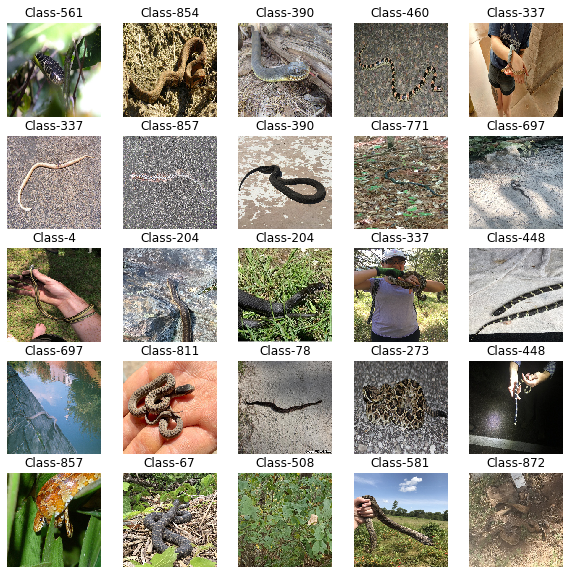

In [26]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)